# Table of contents

- Download latest data
- Retrain model
- Display current squad
- Use model to identify transfers
- Identify playing 11
- Show top performers by position

In [1]:
import pandas as pd
import torch
import numpy as np
import random
from random import shuffle
np.random.seed(17)
random.seed(17)
torch.manual_seed(17)
import wget
import os
import aiohttp
import asyncio
from fpl import FPL
from torch.utils.data import TensorDataset, DataLoader
from player import Player
from team import Team
from data_processor import get_fpl, get_current_squad
from agent import Agent

## Download latest data, train model and save model.

In [2]:
opponent_feature_names = ["npxG","npxGA"]
player_feature_names = ["total_points", "ict_index", "clean_sheets", "saves", "assists"]

agent = Agent(player_feature_names, opponent_feature_names, epochs=1)
await agent.get_data()
await agent.update_model()

GPU available: False, used: False


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


/home/ajrfhp/anaconda3/envs/control/lib/python3.8/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/home/ajrfhp/Control/Control_FPL/data_processor.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_player_features["total_points"] = all_player_features["total_points"].clip(0, max_player_points)



  | Name  | Type        | Params
--------------------------------------
0 | model | LinearModel | 29    
--------------------------------------
29        Trainable params
0         Non-trainable params
29        Total params
0.000     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Validation sanity check:   0%|                                                                    | 0/2 [00:00<?, ?it/s]

Validation sanity check:  50%|██████████████████████████████                              | 1/2 [00:00<00:00,  3.24it/s]

/home/ajrfhp/anaconda3/envs/control/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:322: UserWarning: The number of training samples (49) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: -1it [00:00, ?it/s]

Training:   0%|                                                                       | 0/62 [00:00<00:00, 33026.02it/s]

Epoch 0:   0%|                                                                         | 0/62 [00:00<00:00, 1961.79it/s]

Epoch 0:   2%|█▏                                                                         | 1/62 [00:00<00:06,  8.88it/s]

Epoch 0:   2%|▉                                                      | 1/62 [00:00<00:06,  8.81it/s, loss=2.02, v_num=1]

Epoch 0:   3%|█▊                                                     | 2/62 [00:00<00:04, 13.03it/s, loss=2.12, v_num=1]

Epoch 0:   5%|██▋                                                    | 3/62 [00:00<00:03, 17.11it/s, loss=2.09, v_num=1]

Epoch 0:   6%|███▌                                                    | 4/62 [00:00<00:02, 21.11it/s, loss=2.1, v_num=1]

Epoch 0:   8%|████▍                                                  | 5/62 [00:00<00:02, 25.01it/s, loss=2.04, v_num=1]

Epoch 0:  10%|█████▎                                                 | 6/62 [00:00<00:01, 28.82it/s, loss=2.04, v_num=1]

Epoch 0:  11%|██████▏                                                | 7/62 [00:00<00:01, 32.54it/s, loss=2.04, v_num=1]

Epoch 0:  13%|███████                                                | 8/62 [00:00<00:01, 36.10it/s, loss=1.99, v_num=1]

Epoch 0:  15%|███████▉                                               | 9/62 [00:00<00:01, 39.68it/s, loss=1.98, v_num=1]

Epoch 0:  16%|████████▋                                             | 10/62 [00:00<00:01, 43.12it/s, loss=1.96, v_num=1]

Epoch 0:  18%|█████████▌                                            | 11/62 [00:00<00:01, 46.56it/s, loss=1.92, v_num=1]

Epoch 0:  19%|██████████▍                                           | 12/62 [00:00<00:01, 49.92it/s, loss=1.91, v_num=1]

Epoch 0:  21%|███████████▎                                          | 13/62 [00:00<00:00, 53.24it/s, loss=1.91, v_num=1]

Epoch 0:  23%|████████████▏                                         | 14/62 [00:00<00:00, 56.38it/s, loss=1.88, v_num=1]

Epoch 0:  24%|█████████████                                         | 15/62 [00:00<00:00, 59.50it/s, loss=1.85, v_num=1]

Epoch 0:  26%|█████████████▉                                        | 16/62 [00:00<00:00, 62.60it/s, loss=1.85, v_num=1]

Epoch 0:  27%|██████████████▊                                       | 17/62 [00:00<00:00, 65.63it/s, loss=1.84, v_num=1]

Epoch 0:  29%|███████████████▋                                      | 18/62 [00:00<00:00, 68.50it/s, loss=1.84, v_num=1]

Epoch 0:  31%|████████████████▌                                     | 19/62 [00:00<00:00, 71.33it/s, loss=1.82, v_num=1]

Epoch 0:  32%|█████████████████▋                                     | 20/62 [00:00<00:00, 73.68it/s, loss=1.8, v_num=1]

Epoch 0:  34%|██████████████████▎                                   | 21/62 [00:00<00:00, 76.38it/s, loss=1.79, v_num=1]

Epoch 0:  35%|███████████████████▏                                  | 22/62 [00:00<00:00, 79.13it/s, loss=1.75, v_num=1]

Epoch 0:  37%|████████████████████                                  | 23/62 [00:00<00:00, 81.83it/s, loss=1.72, v_num=1]

Epoch 0:  39%|████████████████████▉                                 | 24/62 [00:00<00:00, 84.29it/s, loss=1.69, v_num=1]

Epoch 0:  40%|█████████████████████▊                                | 25/62 [00:00<00:00, 86.86it/s, loss=1.69, v_num=1]

Epoch 0:  42%|██████████████████████▋                               | 26/62 [00:00<00:00, 89.39it/s, loss=1.66, v_num=1]

Epoch 0:  44%|███████████████████████▌                              | 27/62 [00:00<00:00, 91.88it/s, loss=1.65, v_num=1]

Epoch 0:  45%|████████████████████████▍                             | 28/62 [00:00<00:00, 94.35it/s, loss=1.64, v_num=1]

Epoch 0:  47%|█████████████████████████▎                            | 29/62 [00:00<00:00, 96.79it/s, loss=1.62, v_num=1]

Epoch 0:  48%|██████████████████████████▌                            | 30/62 [00:00<00:00, 99.03it/s, loss=1.6, v_num=1]

Epoch 0:  50%|███████████████████████████                           | 31/62 [00:00<00:00, 101.33it/s, loss=1.6, v_num=1]

Epoch 0:  52%|███████████████████████████▎                         | 32/62 [00:00<00:00, 103.66it/s, loss=1.57, v_num=1]

Epoch 0:  53%|████████████████████████████▏                        | 33/62 [00:00<00:00, 105.92it/s, loss=1.55, v_num=1]

Epoch 0:  55%|█████████████████████████████                        | 34/62 [00:00<00:00, 108.14it/s, loss=1.55, v_num=1]

Epoch 0:  56%|█████████████████████████████▉                       | 35/62 [00:00<00:00, 110.34it/s, loss=1.55, v_num=1]

Epoch 0:  56%|█████████████████████████████▉                       | 35/62 [00:00<00:00, 110.15it/s, loss=1.54, v_num=1]

Epoch 0:  58%|██████████████████████████████▊                      | 36/62 [00:00<00:00, 112.07it/s, loss=1.52, v_num=1]

Epoch 0:  60%|███████████████████████████████▋                     | 37/62 [00:00<00:00, 114.17it/s, loss=1.52, v_num=1]

Epoch 0:  61%|█████████████████████████████████                     | 38/62 [00:00<00:00, 116.25it/s, loss=1.5, v_num=1]

Epoch 0:  63%|█████████████████████████████████▎                   | 39/62 [00:00<00:00, 118.29it/s, loss=1.49, v_num=1]

Epoch 0:  65%|██████████████████████████████████▏                  | 40/62 [00:00<00:00, 119.96it/s, loss=1.48, v_num=1]

Epoch 0:  66%|███████████████████████████████████                  | 41/62 [00:00<00:00, 121.74it/s, loss=1.47, v_num=1]

Epoch 0:  68%|███████████████████████████████████▉                 | 42/62 [00:00<00:00, 123.51it/s, loss=1.47, v_num=1]

Epoch 0:  69%|████████████████████████████████████▊                | 43/62 [00:00<00:00, 125.28it/s, loss=1.46, v_num=1]

Epoch 0:  71%|█████████████████████████████████████▌               | 44/62 [00:00<00:00, 127.01it/s, loss=1.45, v_num=1]

Epoch 0:  73%|██████████████████████████████████████▍              | 45/62 [00:00<00:00, 128.63it/s, loss=1.42, v_num=1]

Epoch 0:  74%|███████████████████████████████████████▎             | 46/62 [00:00<00:00, 129.91it/s, loss=1.42, v_num=1]

Epoch 0:  76%|████████████████████████████████████████▏            | 47/62 [00:00<00:00, 130.88it/s, loss=1.39, v_num=1]

Epoch 0:  77%|█████████████████████████████████████████            | 48/62 [00:00<00:00, 132.43it/s, loss=1.37, v_num=1]

Epoch 0:  79%|█████████████████████████████████████████▉           | 49/62 [00:00<00:00, 128.39it/s, loss=1.37, v_num=1]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                | 0/13 [00:00<?, ?it/s]

Validating:   8%|█████▌                                                                  | 1/13 [00:00<00:01,  6.93it/s]

Epoch 0: 100%|█████████████████████████████████████████████████████| 62/62 [00:00<00:00, 108.50it/s, loss=1.37, v_num=1]

Epoch 0: 100%|█████████████████████████████████████████████████████| 62/62 [00:00<00:00, 107.40it/s, loss=1.37, v_num=1]

## Show game week id

In [3]:
os.environ['GAMEWEEK']

'7_2021'

## Display current squad

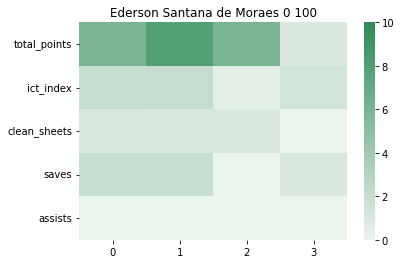

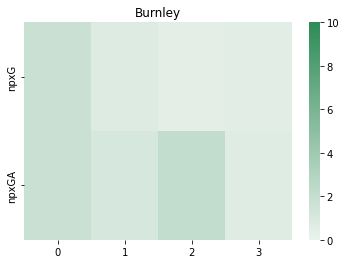

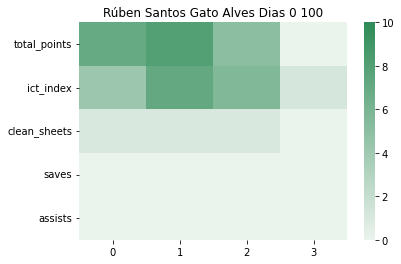

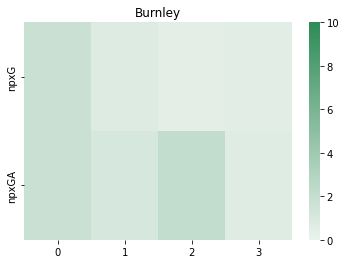

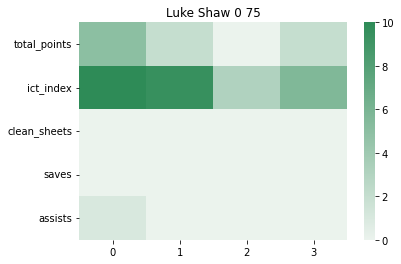

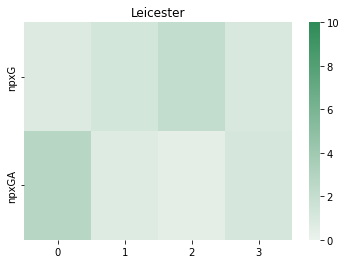

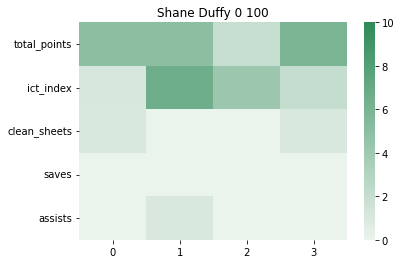

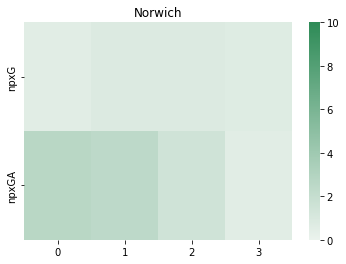

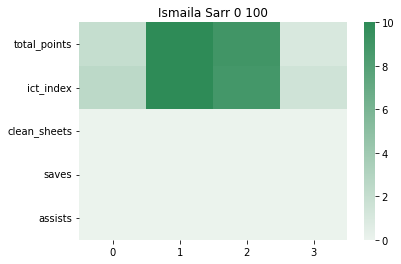

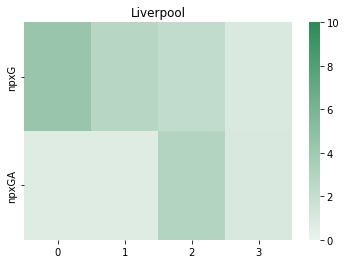

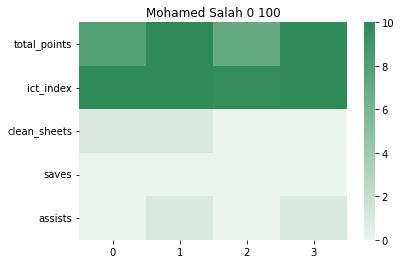

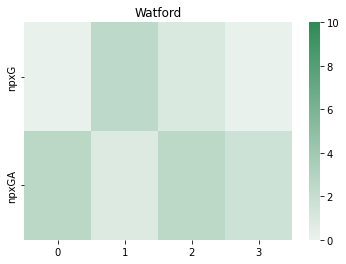

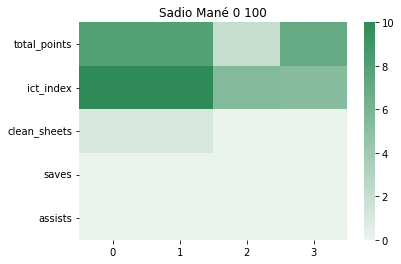

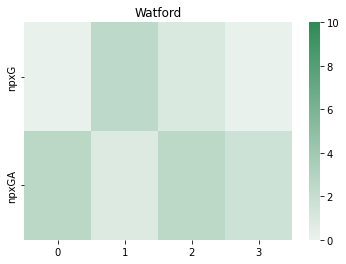

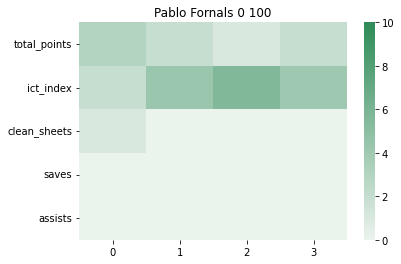

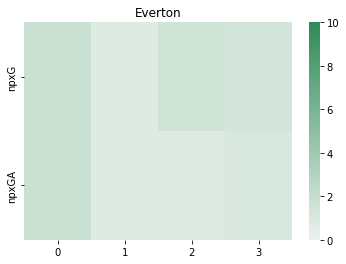

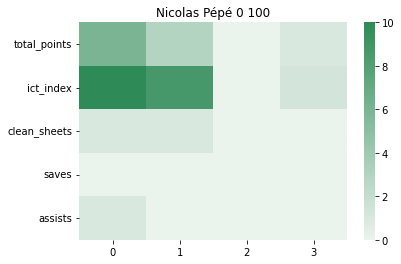

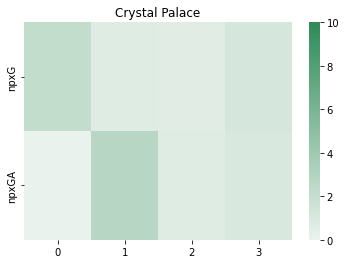

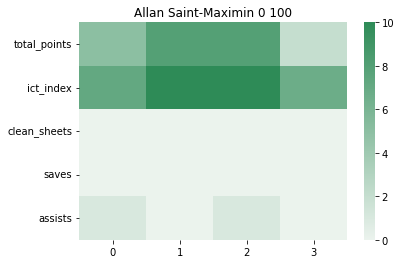

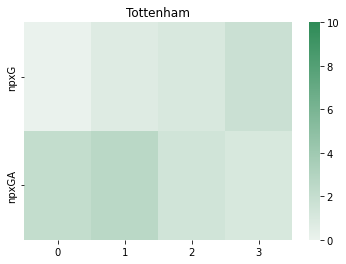

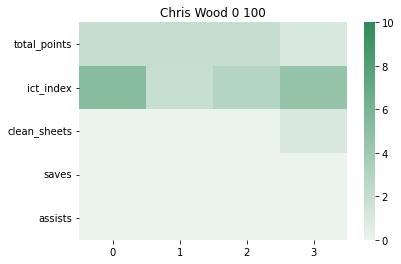

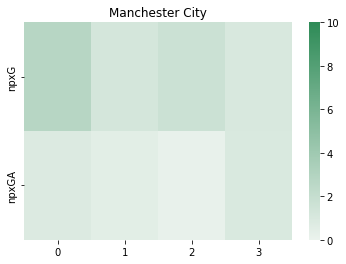

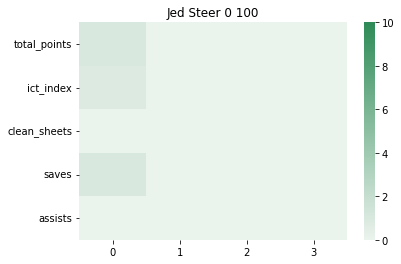

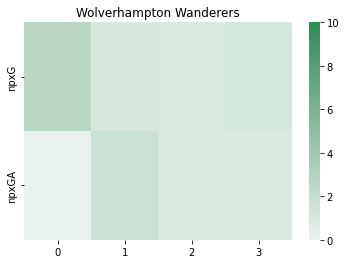

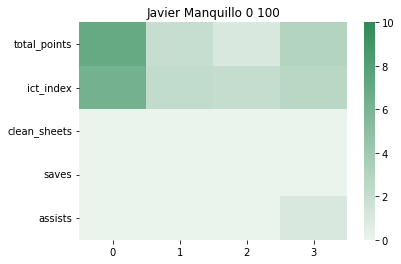

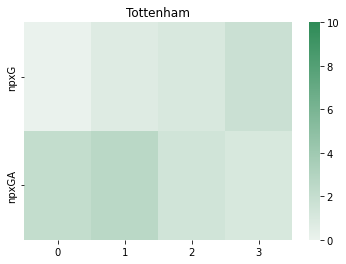

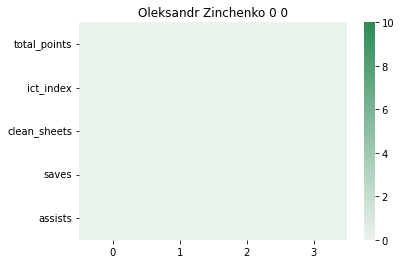

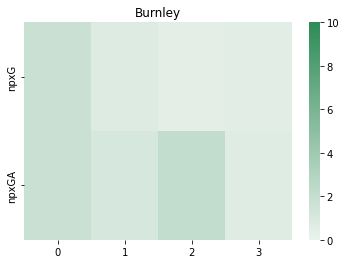

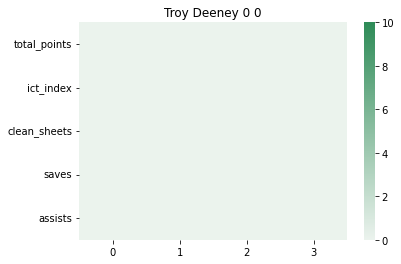

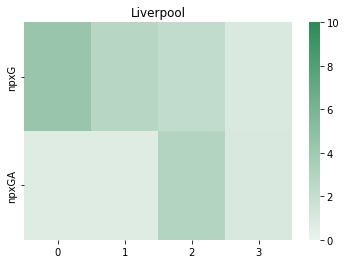

In [4]:
current_squad, non_squad = await get_current_squad(player_feature_names, opponent_feature_names, window=agent.window, num_players=agent.num_players)
for player in current_squad:
    player.visualize()

## Use model to swap players

Player out Troy Deeney. To double trade  = False 


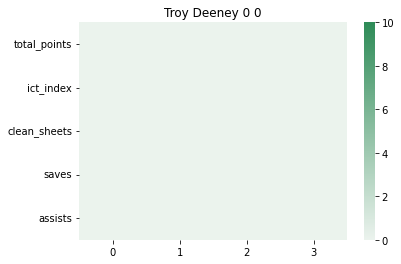

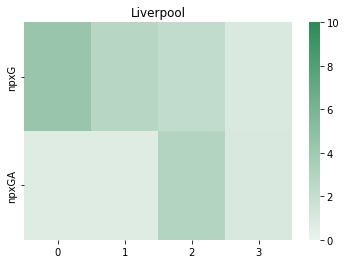

Player in Neal Maupay. To double trade  = False 


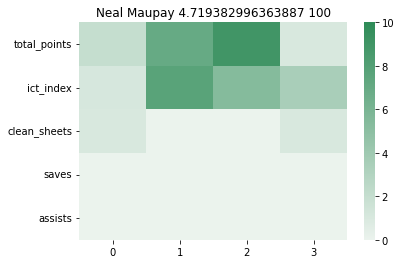

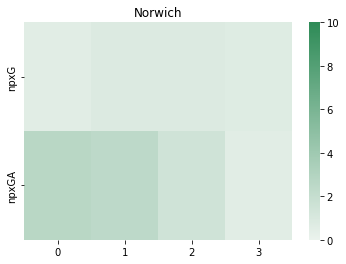

Player out Nicolas Pépé. To double trade  = False 


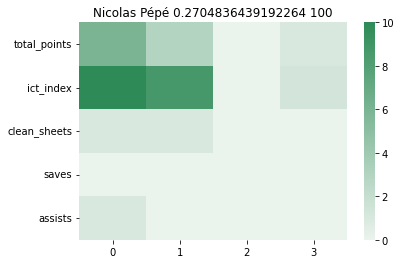

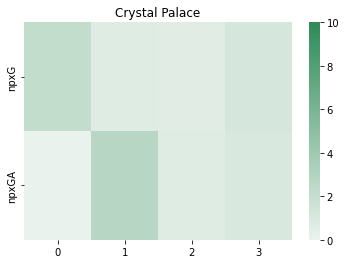

Player in Mateusz Klich. To double trade  = False 


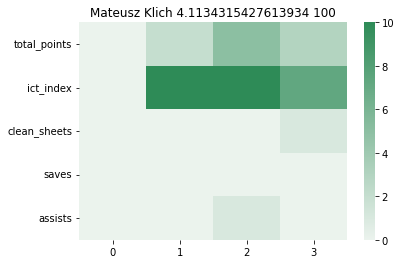

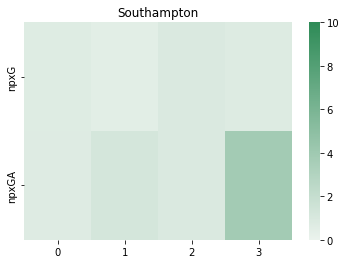

In [5]:
current_squad, non_squad = await agent.get_new_squad(player_feature_names, opponent_feature_names)

## Set playing 11

agent.set_playing_11(current_squad, visualize=True)

## Highlight top performers by position for this week





Goalkeeper
Michael McGovern


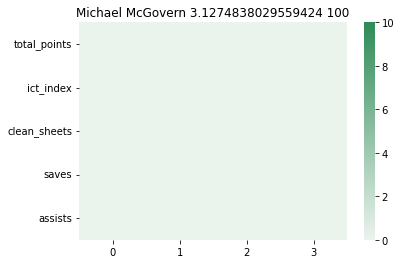

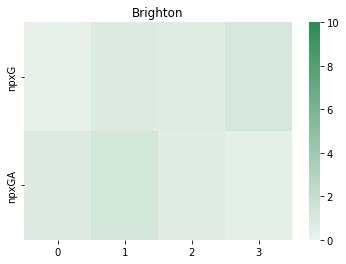

Angus Gunn


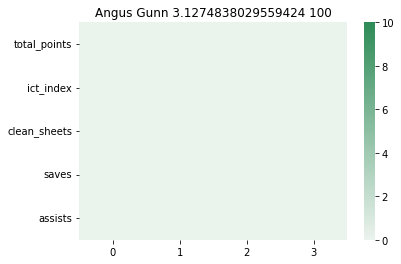

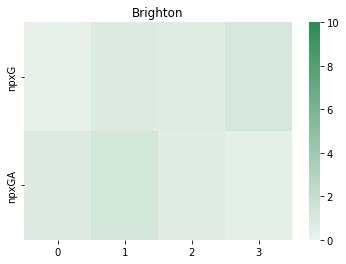

Jason Steele


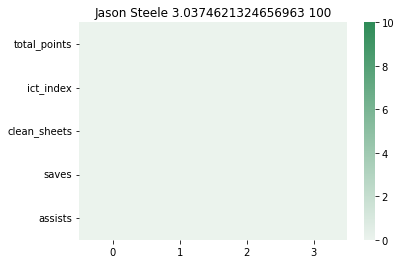

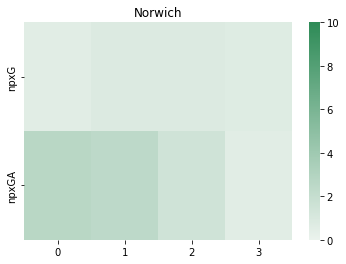

Kjell Scherpen


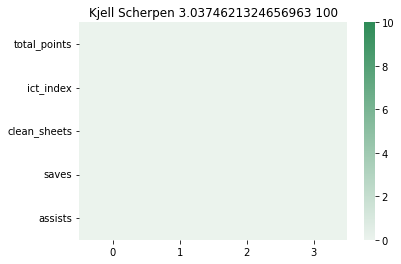

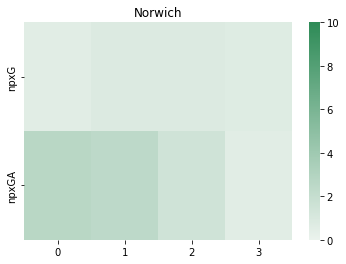

José Malheiro de Sá


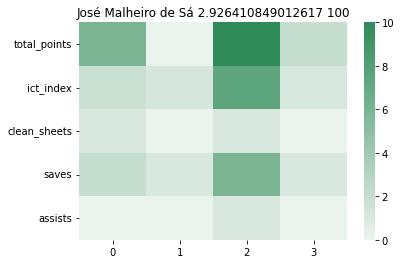

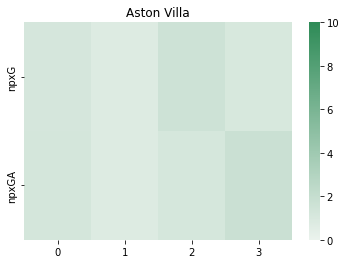










Defender
Joël Veltman


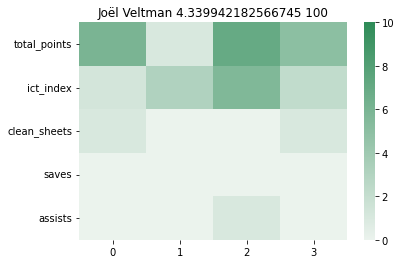

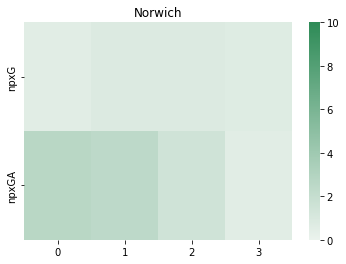

Sergio Reguilón


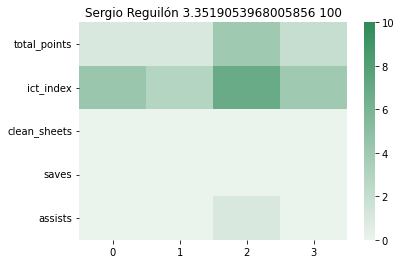

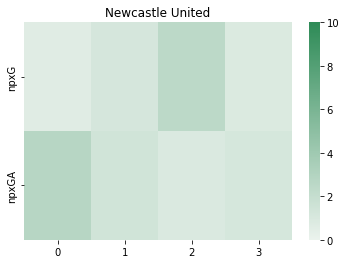

Lewis Dunk


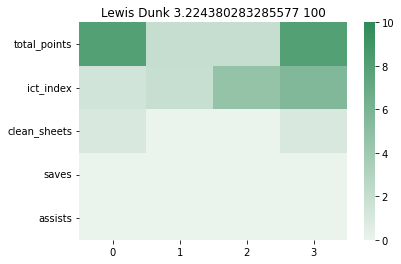

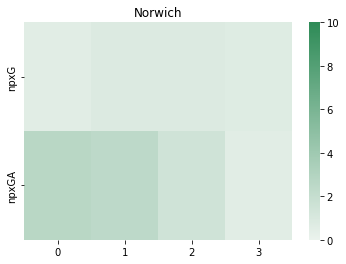

Kortney Hause


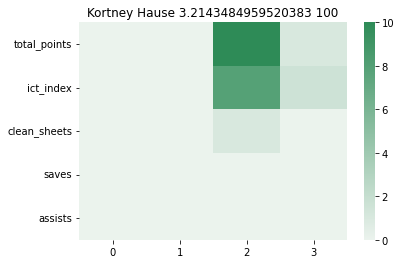

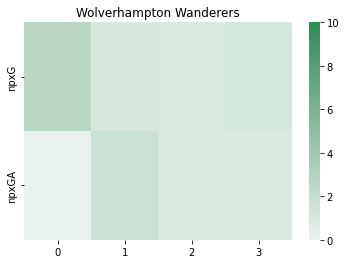

Javier Manquillo


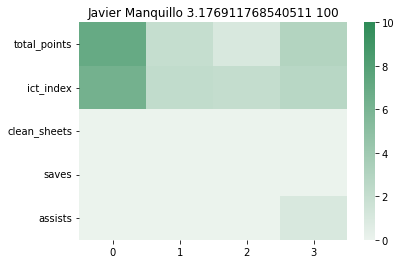

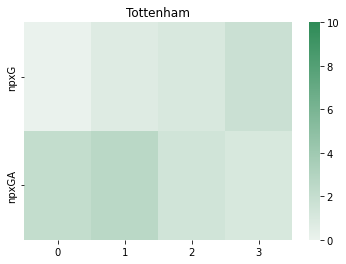










Midfielder
Heung-Min Son


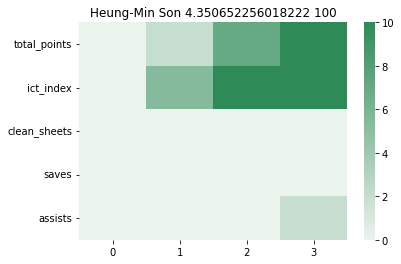

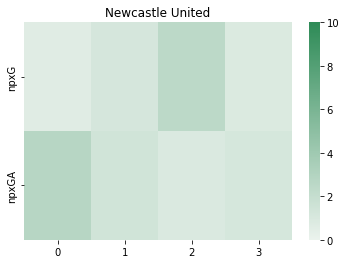

Mateusz Klich


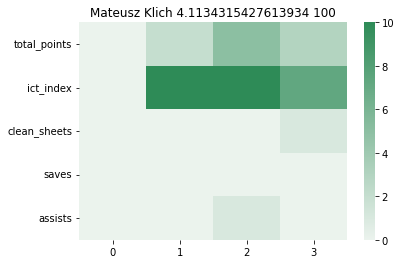

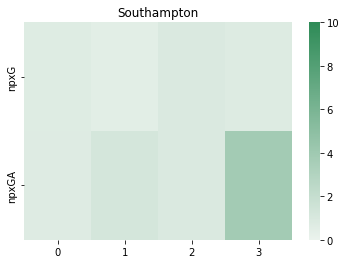

Emile Smith Rowe


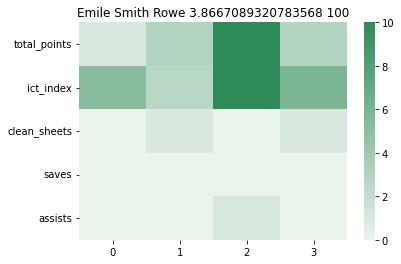

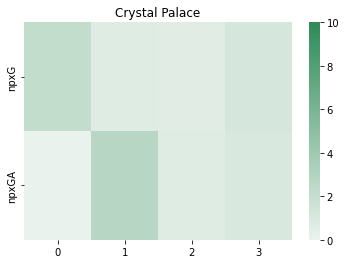

Raphael Dias Belloli


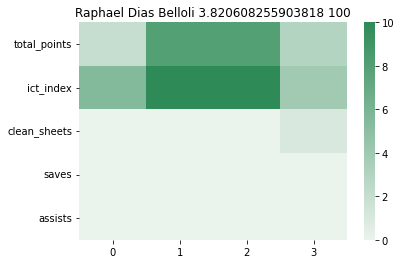

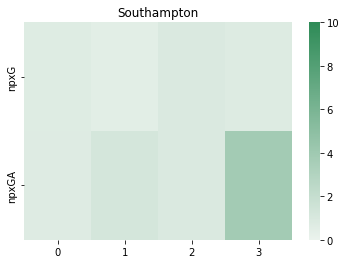

Sean Longstaff


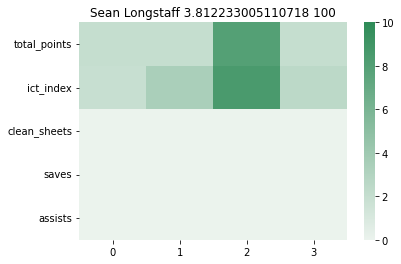

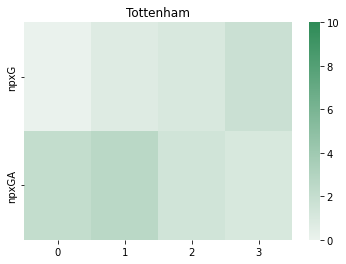










Forward
Neal Maupay


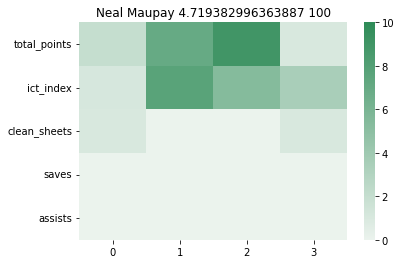

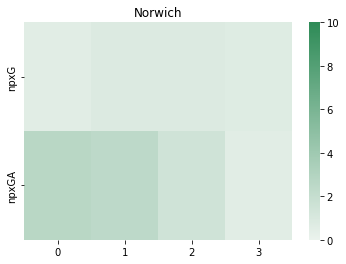

Danny Welbeck


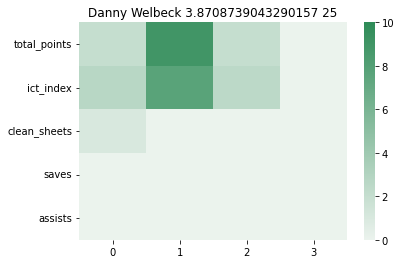

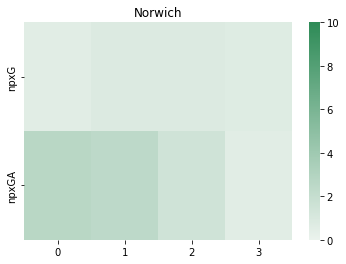

Allan Saint-Maximin


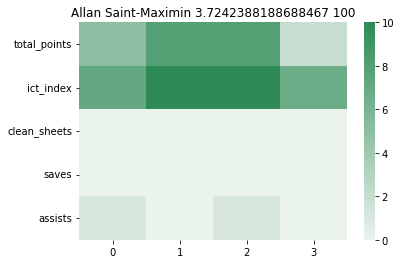

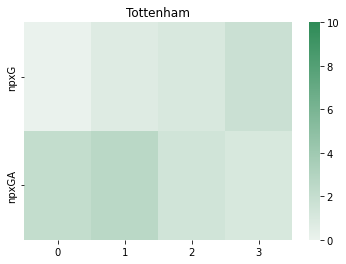

Jamie Vardy


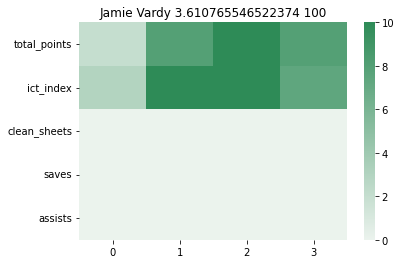

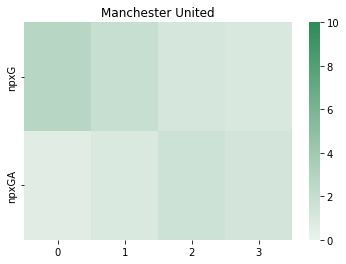

Joshua Sargent


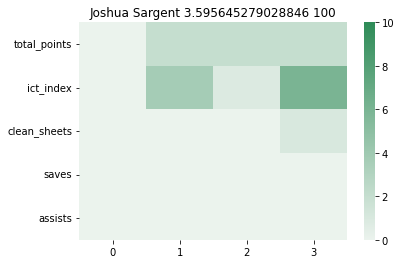

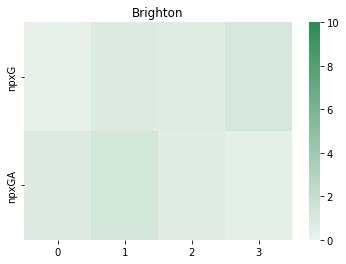

In [6]:
agent.show_top_performers(current_squad + non_squad, k=5)